In [1]:
import pandas as pd

# Load the dataset
file_path = 'bmi.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [2]:
# Descriptive Statistics
desc_stats = data.describe()

# Display descriptive statistics
desc_stats


,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


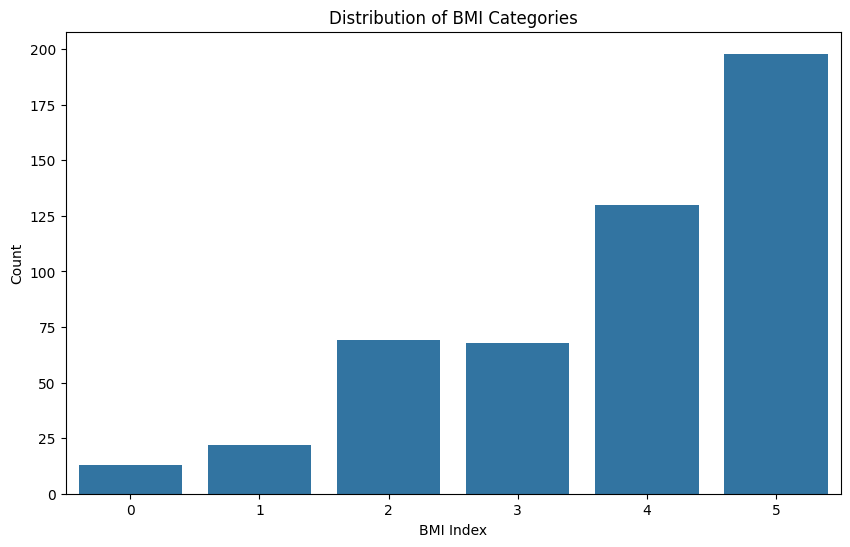

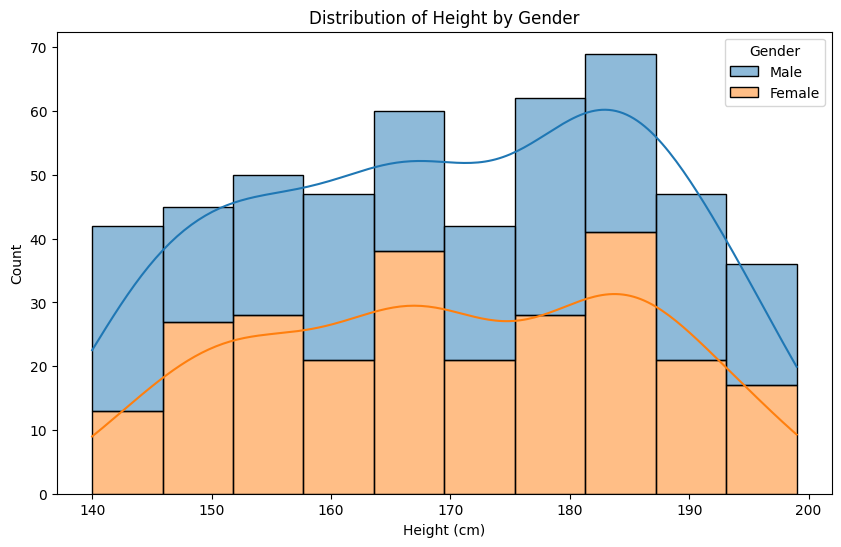

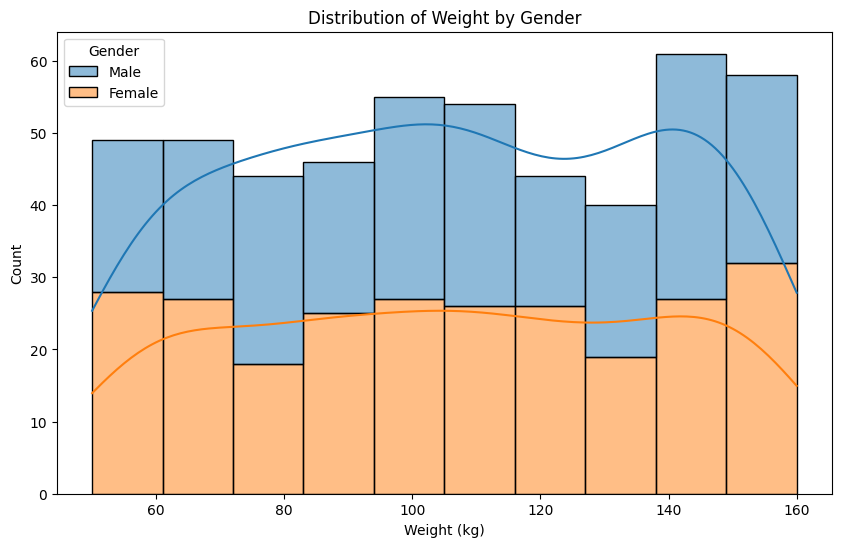

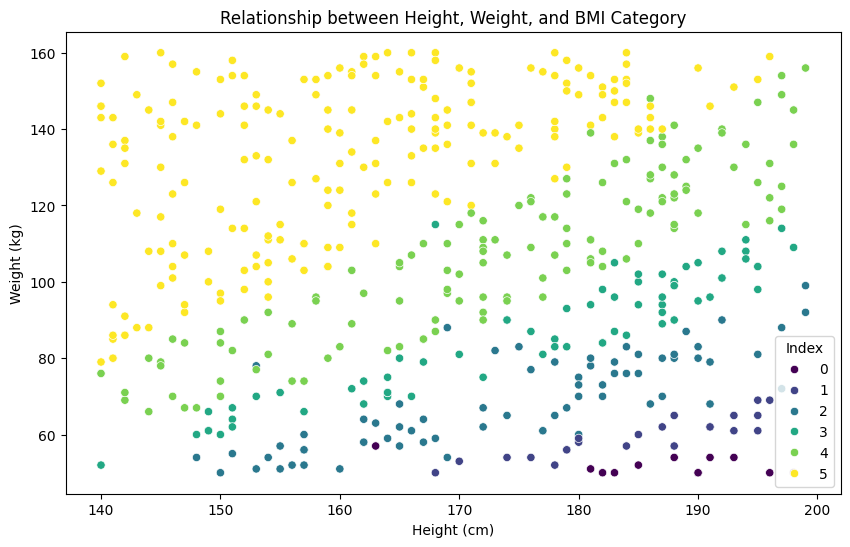

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Distribution of BMI categories
sns.countplot(x='Index', data=data)
plt.title('Distribution of BMI Categories')
plt.xlabel('BMI Index')
plt.ylabel('Count')
plt.show()

# Distribution of Height by Gender
plt.figure(figsize=(10, 6))
sns.histplot(data, x='Height', hue='Gender', multiple='stack', kde=True)
plt.title('Distribution of Height by Gender')
plt.xlabel('Height (cm)')
plt.ylabel('Count')
plt.show()

# Distribution of Weight by Gender
plt.figure(figsize=(10, 6))
sns.histplot(data, x='Weight', hue='Gender', multiple='stack', kde=True)
plt.title('Distribution of Weight by Gender')
plt.xlabel('Weight (kg)')
plt.ylabel('Count')
plt.show()

# Relationship between Height, Weight, and BMI category
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Height', y='Weight', hue='Index', palette='viridis', data=data)
plt.title('Relationship between Height, Weight, and BMI Category')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()


In [4]:
from scipy.stats import ttest_ind, pearsonr

# Hypothesis Testing: Height Difference by Gender
height_male = data[data['Gender'] == 'Male']['Height']
height_female = data[data['Gender'] == 'Female']['Height']
t_stat_height, p_value_height = ttest_ind(height_male, height_female)

# Hypothesis Testing: Weight Difference by Gender
weight_male = data[data['Gender'] == 'Male']['Weight']
weight_female = data[data['Gender'] == 'Female']['Weight']
t_stat_weight, p_value_weight = ttest_ind(weight_male, weight_female)

# Correlation Analysis
correlation_height_weight, _ = pearsonr(data['Height'], data['Weight'])
correlation_height_index, _ = pearsonr(data['Height'], data['Index'])
correlation_weight_index, _ = pearsonr(data['Weight'], data['Index'])

# Results
inferential_results = {
    "Height Difference by Gender": {"t-statistic": t_stat_height, "p-value": p_value_height},
    "Weight Difference by Gender": {"t-statistic": t_stat_weight, "p-value": p_value_weight},
    "Correlation (Height, Weight)": correlation_height_weight,
    "Correlation (Height, Index)": correlation_height_index,
    "Correlation (Weight, Index)": correlation_weight_index
}

inferential_results


{'Height Difference by Gender': {'t-statistic': -0.3945427386439486,
  'p-value': 0.6933492879236244},
 'Weight Difference by Gender': {'t-statistic': 0.21251758411260588,
  'p-value': 0.8317902189972572},
 'Correlation (Height, Weight)': 0.00044594512830534486,
 'Correlation (Height, Index)': -0.42222291763783737,
 'Correlation (Weight, Index)': 0.8045690944191749}

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Prepare data for modeling
X = data[['Height', 'Weight']]
y = data['Index']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=[
    "Extremely Weak", "Weak", "Normal", "Overweight", "Obesity", "Extreme Obesity"
])

# Results
model_results = {
    "Confusion Matrix": conf_matrix,
    "Classification Report": class_report
}

model_results

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Confusion Matrix': array([[ 1,  0,  0,  0,  0,  0],
        [ 0,  2,  2,  0,  0,  0],
        [ 0,  2, 16,  0,  0,  0],
        [ 0,  0,  2,  5,  1,  0],
        [ 0,  0,  0,  7, 20,  3],
        [ 0,  0,  0,  0,  3, 36]]),
 'Classification Report': '                 precision    recall  f1-score   support\n\n Extremely Weak       1.00      1.00      1.00         1\n           Weak       0.50      0.50      0.50         4\n         Normal       0.80      0.89      0.84        18\n     Overweight       0.42      0.62      0.50         8\n        Obesity       0.83      0.67      0.74        30\nExtreme Obesity       0.92      0.92      0.92        39\n\n       accuracy                           0.80       100\n      macro avg       0.75      0.77      0.75       100\n   weighted avg       0.82      0.80      0.80       100\n'}

In [8]:
!pip install streamlit
import streamlit as st
import numpy as np
import pickle

# Load the trained model
model = pickle.load(open('bmi_model.pkl', 'rb'))

st.title('BMI Category Prediction')

# Input fields for height and weight
height = st.number_input('Height (cm)', min_value=140, max_value=200, value=170)
weight = st.number_input('Weight (kg)', min_value=50, max_value=160, value=70)

# Predict button
if st.button('Predict BMI Category'):
    input_data = np.array([[height, weight]])
    prediction = model.predict(input_data)
    category = prediction[0]

    st.write(f'The predicted BMI category is: {category}')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.1.3 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
2024-06-08 14:44:13.673 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-06-08 14:44:13.676 Session state does not function when running a script without `streamlit run`


In [11]:
!streamlit run streamlit_app.py





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.204.85.172:8501

  Stopping...
  Stopping...
